In [55]:
import tensorflow as tf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
%matplotlib inline

In [3]:
data = pd.read_csv('./PRSA_data_2010.1.1-2014.12.31.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [7]:
data[data['pm2.5'].isna()]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,43549,2014,12,20,12,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,43550,2014,12,20,13,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,43551,2014,12,20,14,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,43552,2014,12,20,15,NaN,-20,2.0,1028.0,NW,262.85,0,0


In [8]:
data = data.iloc[24:].copy()

In [9]:
data.fillna(method='ffill', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43800 non-null  int64  
 1   year    43800 non-null  int64  
 2   month   43800 non-null  int64  
 3   day     43800 non-null  int64  
 4   hour    43800 non-null  int64  
 5   pm2.5   43800 non-null  float64
 6   DEWP    43800 non-null  int64  
 7   TEMP    43800 non-null  float64
 8   PRES    43800 non-null  float64
 9   cbwd    43800 non-null  object 
 10  Iws     43800 non-null  float64
 11  Is      43800 non-null  int64  
 12  Ir      43800 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [11]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,21924.500000,2012.001096,6.526575,15.735890,11.500000,97.784018,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
std,12644.115232,1.413454,3.447092,8.795077,6.922266,91.398542,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10974.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21924.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32874.250000,2013.000000,10.000000,23.000000,17.250000,136.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [12]:
data.drop('No', axis=1, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 24 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43800 non-null  int64  
 1   month   43800 non-null  int64  
 2   day     43800 non-null  int64  
 3   hour    43800 non-null  int64  
 4   pm2.5   43800 non-null  float64
 5   DEWP    43800 non-null  int64  
 6   TEMP    43800 non-null  float64
 7   PRES    43800 non-null  float64
 8   cbwd    43800 non-null  object 
 9   Iws     43800 non-null  float64
 10  Is      43800 non-null  int64  
 11  Ir      43800 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB


In [14]:
import datetime

In [15]:
data['time'] = data.apply(lambda x: datetime.datetime(year=x['year'],
                                       month=x['month'],
                                       day=x['day'], 
                                       hour=x['hour']), 
                          axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    43800 non-null  int64         
 1   month   43800 non-null  int64         
 2   day     43800 non-null  int64         
 3   hour    43800 non-null  int64         
 4   pm2.5   43800 non-null  float64       
 5   DEWP    43800 non-null  int64         
 6   TEMP    43800 non-null  float64       
 7   PRES    43800 non-null  float64       
 8   cbwd    43800 non-null  object        
 9   Iws     43800 non-null  float64       
 10  Is      43800 non-null  int64         
 11  Ir      43800 non-null  int64         
 12  time    43800 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 4.3+ MB


In [17]:
data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,time
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [18]:
data.set_index('time', inplace=True)

In [19]:
data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [20]:
data.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [21]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [22]:
data.columns = ['pm2.5', 'dew', 'temp', 'press', 'cbwd', 'iws', 'snow', 'rain']

In [23]:
data.head()

,pm2.5,dew,temp,press,cbwd,iws,snow,rain
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [24]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [25]:
data.cbwd.value_counts()

SE    15290
NW    14130
cv     9384
NE     4996
Name: cbwd, dtype: int64

In [26]:
#data = data.join(pd.get_dummies(data.cbwd))

In [27]:
data=pd.get_dummies(data,columns=["cbwd"])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pm2.5    43800 non-null  float64
 1   dew      43800 non-null  int64  
 2   temp     43800 non-null  float64
 3   press    43800 non-null  float64
 4   iws      43800 non-null  float64
 5   snow     43800 non-null  int64  
 6   rain     43800 non-null  int64  
 7   cbwd_NE  43800 non-null  uint8  
 8   cbwd_NW  43800 non-null  uint8  
 9   cbwd_SE  43800 non-null  uint8  
 10  cbwd_cv  43800 non-null  uint8  
dtypes: float64(4), int64(3), uint8(4)
memory usage: 2.8 MB


<AxesSubplot:xlabel='time'>

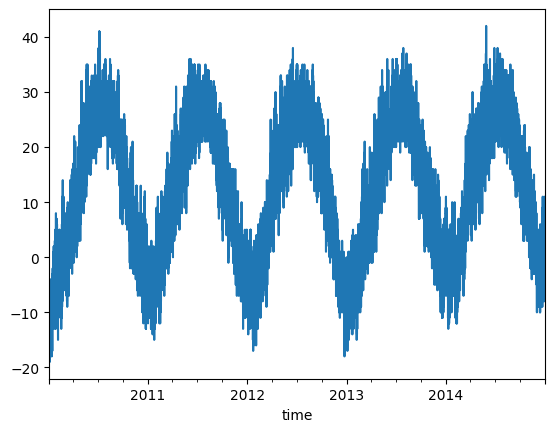

In [29]:
data['temp'].plot()#看一下温度变化

<AxesSubplot:xlabel='time'>

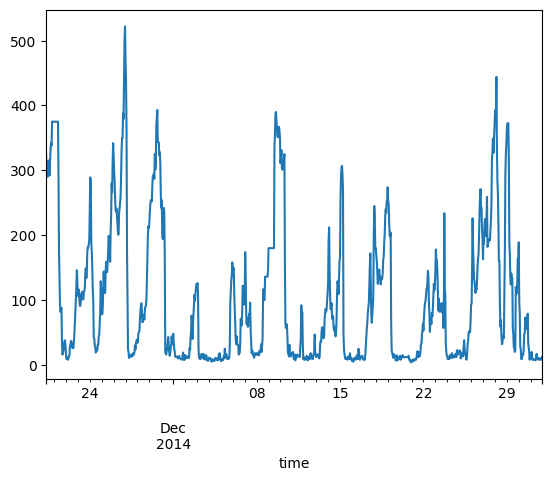

In [30]:
data["pm2.5"][-1000:].plot()#看一下pm2.5的变化

In [31]:
data.head(3)

,pm2.5,dew,temp,press,iws,snow,rain,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0


In [32]:
data.iloc[-1,0:3]#这样子切片

pm2.5    12.0
dew     -21.0
temp     -3.0
Name: 2014-12-31 23:00:00, dtype: float64

In [33]:
sequence_length = 5*24
delay = 1

In [34]:
data_ = []
for i in range(len(data) - sequence_length):
    data_.append(data.iloc[i: i + sequence_length + delay])

In [35]:
data_[0].values

array([[129., -16.,  -4., ...,   0.,   1.,   0.],
       [148., -15.,  -4., ...,   0.,   1.,   0.],
       [159., -11.,  -5., ...,   0.,   1.,   0.],
       ...,
       [ 93., -22., -16., ...,   1.,   0.,   0.],
       [131., -21., -16., ...,   1.,   0.,   0.],
       [127., -21., -16., ...,   1.,   0.,   0.]])

In [36]:
[df.values for df in data_]

[array([[129., -16.,  -4., ...,   0.,   1.,   0.],
        [148., -15.,  -4., ...,   0.,   1.,   0.],
        [159., -11.,  -5., ...,   0.,   1.,   0.],
        ...,
        [ 93., -22., -16., ...,   1.,   0.,   0.],
        [131., -21., -16., ...,   1.,   0.,   0.],
        [127., -21., -16., ...,   1.,   0.,   0.]]),
 array([[148., -15.,  -4., ...,   0.,   1.,   0.],
        [159., -11.,  -5., ...,   0.,   1.,   0.],
        [181.,  -7.,  -5., ...,   0.,   1.,   0.],
        ...,
        [131., -21., -16., ...,   1.,   0.,   0.],
        [127., -21., -16., ...,   1.,   0.,   0.],
        [130., -21., -16., ...,   0.,   0.,   1.]]),
 array([[159., -11.,  -5., ...,   0.,   1.,   0.],
        [181.,  -7.,  -5., ...,   0.,   1.,   0.],
        [138.,  -7.,  -5., ...,   0.,   1.,   0.],
        ...,
        [127., -21., -16., ...,   1.,   0.,   0.],
        [130., -21., -16., ...,   0.,   0.,   1.],
        [ 43., -22., -18., ...,   0.,   0.,   1.]]),
 array([[181.,  -7.,  -5., ...,   0.,

In [37]:
data_ = np.array([df.values for df in data_])

In [38]:
data_

array([[[129., -16.,  -4., ...,   0.,   1.,   0.],
        [148., -15.,  -4., ...,   0.,   1.,   0.],
        [159., -11.,  -5., ...,   0.,   1.,   0.],
        ...,
        [ 93., -22., -16., ...,   1.,   0.,   0.],
        [131., -21., -16., ...,   1.,   0.,   0.],
        [127., -21., -16., ...,   1.,   0.,   0.]],

       [[148., -15.,  -4., ...,   0.,   1.,   0.],
        [159., -11.,  -5., ...,   0.,   1.,   0.],
        [181.,  -7.,  -5., ...,   0.,   1.,   0.],
        ...,
        [131., -21., -16., ...,   1.,   0.,   0.],
        [127., -21., -16., ...,   1.,   0.,   0.],
        [130., -21., -16., ...,   0.,   0.,   1.]],

       [[159., -11.,  -5., ...,   0.,   1.,   0.],
        [181.,  -7.,  -5., ...,   0.,   1.,   0.],
        [138.,  -7.,  -5., ...,   0.,   1.,   0.],
        ...,
        [127., -21., -16., ...,   1.,   0.,   0.],
        [130., -21., -16., ...,   0.,   0.,   1.],
        [ 43., -22., -18., ...,   0.,   0.,   1.]],

       ...,

       [[242.,  -9.,  -4

In [39]:
data_.shape

(43680, 121, 11)

In [40]:
np.random.shuffle(data_)

In [41]:
data_.shape

(43680, 121, 11)

In [42]:
x = data_[:, :-1, :]
y = data_[:, -1, 0]

In [43]:
split_boundary = int(data_.shape[0] * 0.8)

In [44]:
train_x = x[: split_boundary]
test_x = x[split_boundary:]

train_y = y[: split_boundary]
test_y = y[split_boundary:]

In [45]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((34944, 120, 11), (8736, 120, 11), (34944,), (8736,))

In [46]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

In [47]:
mean.shape

(120, 11)

In [48]:
train_x = (train_x - mean)/std

In [49]:
test_x = (test_x - mean)/std

In [50]:
batch_size = 128

In [57]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1320)              0         
                                                                 
 dense (Dense)               (None, 32)                42272     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 42,305
Trainable params: 42,305
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mse',metrics=["mae"])
# 训练模型
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=50,
                    validation_data=(test_x, test_y)
                    )

Epoch 1/50
273/273 [==============================] - 2s 5ms/step - loss: 9673.4707 - mae: 65.9442 - val_loss: 4657.7168 - val_mae: 49.2518
Epoch 2/50
273/273 [==============================] - 1s 4ms/step - loss: 3463.3071 - mae: 42.4219 - val_loss: 2746.4441 - val_mae: 37.1120
Epoch 3/50
273/273 [==============================] - 1s 4ms/step - loss: 2374.9089 - mae: 34.7605 - val_loss: 2149.9084 - val_mae: 32.5521
Epoch 4/50
273/273 [==============================] - 1s 4ms/step - loss: 1889.6704 - mae: 30.7088 - val_loss: 1783.7139 - val_mae: 29.3938
Epoch 5/50
273/273 [==============================] - 1s 4ms/step - loss: 1590.8835 - mae: 27.8269 - val_loss: 1555.1646 - val_mae: 27.0156
Epoch 6/50
273/273 [==============================] - 1s 4ms/step - loss: 1378.4132 - mae: 25.6701 - val_loss: 1382.2646 - val_mae: 25.5269
Epoch 7/50
273/273 [==============================] - 1s 4ms/step - loss: 1223.1298 - mae: 23.9664 - val_loss: 1257.6130 - val_mae: 24.0964
Epoch 8/50
273/273 [

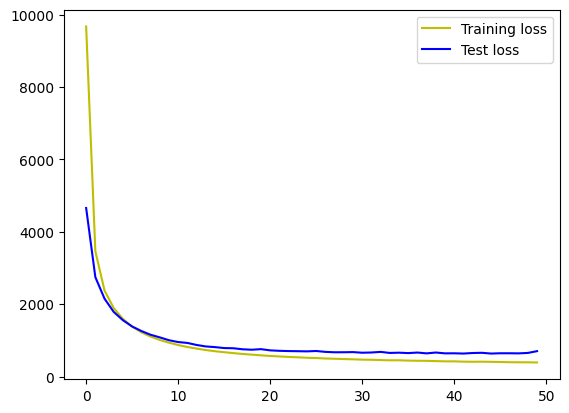

In [60]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

In [68]:
model = keras.Sequential()
# 用长短时模型训练
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:]),return_sequences=True,activation="relu"))
model.add(layers.LSTM(32,return_sequences = True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [69]:
train_x.shape[1:]

(120, 11)

In [70]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae')

In [72]:
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=4,
                    validation_data=(test_x, test_y))

Epoch 1/4
273/273 [==============================] - 39s 142ms/step - loss: 86.0309 - val_loss: 81.8670
Epoch 2/4
273/273 [==============================] - 35s 128ms/step - loss: 79.5938 - val_loss: 77.0090
Epoch 3/4
273/273 [==============================] - 37s 134ms/step - loss: 75.5863 - val_loss: 73.4502
Epoch 4/4
273/273 [==============================] - 37s 134ms/step - loss: 72.5642 - val_loss: 70.7269


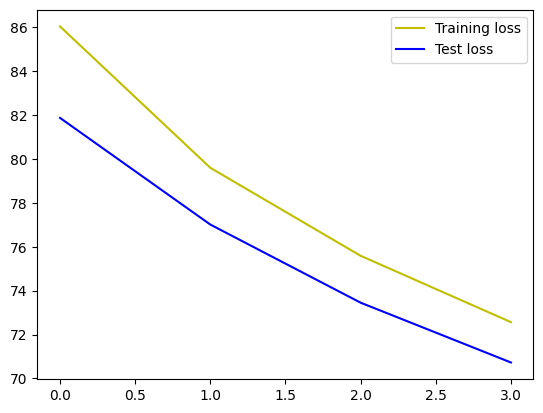

In [73]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

In [74]:
model = keras.Sequential()
model.add(layers.SimpleRNN(32, input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(layers.GRU(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [75]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 120, 32)           1408      
                                                                 
 gru (GRU)                   (None, 120, 32)           6336      
                                                                 
 lstm_10 (LSTM)              (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,097
Trainable params: 16,097
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer=keras.optimizers.Adam(), loss='mae')

In [77]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

In [78]:
history = model.fit(train_x, train_y,
                    batch_size = 128,
                    epochs=4,
                    validation_data=(test_x, test_y),
                    callbacks=[learning_rate_reduction])

Epoch 1/4
273/273 [==============================] - 35s 109ms/step - loss: 88.1288 - val_loss: 82.9474 - lr: 0.0010
Epoch 2/4
273/273 [==============================] - 28s 103ms/step - loss: 80.4609 - val_loss: 77.7626 - lr: 0.0010
Epoch 3/4
273/273 [==============================] - 3215s 12s/step - loss: 76.2316 - val_loss: 74.0462 - lr: 0.0010
Epoch 4/4
273/273 [==============================] - 25s 93ms/step - loss: 73.0795 - val_loss: 71.1939 - lr: 0.0010


In [79]:
model.save("123.h5")  #保存模型

In [80]:
model.predict(test_x)  #模型预测

273/273 [==============================] - 9s 29ms/step


array([[37.436035],
       [37.43662 ],
       [37.43674 ],
       ...,
       [37.437386],
       [37.4377  ],
       [37.437393]], dtype=float32)

In [81]:
model.evaluate(test_x,test_y,verbose=0)  #评价模型

71.19396209716797